# Fashion Classification

Multi-class classification using neural networks.

- [image-net dataset](https://image-net.org/)
- [Pre trained models (Keras)](https://keras.io/api/applications/)

Complementary material:

- [course - cs231n](https://cs231n.github.io/)


Append notebooks directory to sys.path


In [ ]:
import sys

sys.path.append("../../..")

Install packages


In [2]:
!uv pip install -q \
    python-dotenv==1.2.1 \
    pandas==2.3.2 \
    pandas-stubs==2.3.2.250827 \
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    tensorflow==2.20.0 \
    scipy==1.16.3

Import packages


In [3]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import (
     Xception, preprocess_input, decode_predictions
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pd.set_option("display.max_columns", None)

sns.set_style("darkgrid")
sns.set_theme(style="darkgrid")

%matplotlib inline

2025-12-30 15:45:32.246741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-30 15:45:32.258780: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-30 15:45:32.667104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-30 15:45:36.918900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Create data directory


In [ ]:
DATA_DIR = pathlib.Path("data/fashion-classification")

os.makedirs(DATA_DIR, exist_ok=True)

Download images from github repository


In [5]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small $DATA_DIR --depth 1

fatal: destination path 'data/fashion-classification' already exists and is not an empty directory.


Loading an image


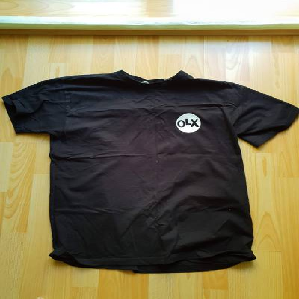

In [ ]:
file_name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
path = DATA_DIR / "train" / "t-shirt" / file_name
img = load_img(path, target_size=(299, 299))
img

Check image object


In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x77FED8EBA450>


Seeing the image as array, each array contains 3 values (RGB)


In [ ]:
np.array(img)[:3, :3, :]

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126]]], dtype=uint8)

Array size


In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks


Instance model


In [ ]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2025-12-30 08:54:47.542447: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Check X shape


In [ ]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

Preprocess the image to fit the model input requirements

Instead of **0 - 255** (RGB), values should be between _-1 and 1_


In [ ]:
X = preprocess_input(X)
X[:, :3, :3, :]

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471]]]], dtype=float32)

Predict


In [ ]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


(1, 1000)

Decode predictions


In [ ]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.68196267)),
  ('n02916936', 'bulletproof_vest', np.float32(0.03814007)),
  ('n04370456', 'sweatshirt', np.float32(0.03432477)),
  ('n03710637', 'maillot', np.float32(0.011354245)),
  ('n04525038', 'velvet', np.float32(0.0018453626))]]

## Convolutional Neural Networks (CNNs)

- Convolutional layers
- Dense Layers
- Pooling Layers

### Convolutional Layers

Convolultional layers are based in filters (kernels) that slide through the input data to extract features.

For each part of the input data and each filter, is calculated the similarity between the filter and the input data.

As result, we have a feature map that indicates where the feature represented by the filter is found in the input data.

High values in the feature map indicate high similarity between the filter and the input data.

At the end we have several feature maps, one for each filter.

Then another layer can be added to extract more complex features based on the previous feature maps and so on.

The final result is a vector that represents the input data in terms of the features extracted by the filters.

### Dense Layers

Dense layers connect each element of input data to each element of output data.

There are a lot of connections and each connection has a weight that indicates the importance of that connection.

### Pooling Layers

Pooling layers are used to reduce the size of the input data.


## Transfer Learning

- Use the convolutional base of a pre-trained model
- Add custom dense layers on top
- Train only the custom layers


In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
train_dataset = train_generator.flow_from_directory(
    DATA_DIR / "train",
    target_size=(150, 150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


Class names are inferred from the directory structure


In [ ]:
train_dataset.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

Folders


In [18]:
!ls $DATA_DIR/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


Validation Data


In [ ]:
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_dataset = validation_generator.flow_from_directory(
    DATA_DIR / "validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


Setup model for transfer learning


In [ ]:
base_model = Xception(
    weights="imagenet",
    include_top=False,  # Top means the dense layers
    input_shape=(150, 150, 3),
)

base_model.trainable = False  # Do not train the convolutional base

Define model


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)  # 3 Dimensional

pooling = keras.layers.GlobalAveragePooling2D()

vectors = pooling(base)  # 2 Dimensional

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

Define optimizer and loss function


In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

Compile model


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

Train model


In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,  # Go through the dataset 10 times
    validation_data=validation_dataset,
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 738ms/step - accuracy: 0.6640 - loss: 1.3232 - val_accuracy: 0.7302 - val_loss: 1.0214
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 762ms/step - accuracy: 0.8312 - loss: 0.5431 - val_accuracy: 0.7889 - val_loss: 0.8865
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 806ms/step - accuracy: 0.8915 - loss: 0.3086 - val_accuracy: 0.7654 - val_loss: 0.9782
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 790ms/step - accuracy: 0.9133 - loss: 0.2490 - val_accuracy: 0.7889 - val_loss: 0.8459
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 790ms/step - accuracy: 0.9355 - loss: 0.1825 - val_accuracy: 0.7889 - val_loss: 0.9866
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 786ms/step - accuracy: 0.9544 - loss: 0.1289 - val_accuracy: 0.8006 - val_loss: 0.9130
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 789ms/step - accuracy: 0.9677 - loss: 0.0855 - val_accuracy: 0.8182 - val_loss: 0.8773
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 788ms/step - accuracy: 0.9899 - loss: 0.0419 - val_accu

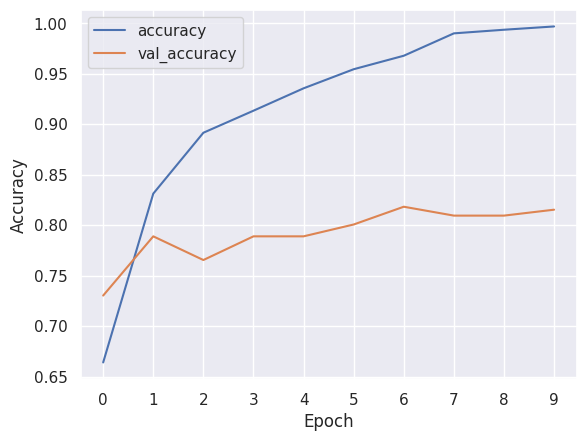

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xticks(range(10))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adjusting Learning Rate

We can do an analogy to learning rate as how fast you can read a book, if you read to much books very fast when you need to apply the knowledge you may not have learned the necessary, also if you read to slow, you may not have acquire enough knowledge and will also perform poorly.

- Too high learning rate may overfit the model
- Too low learning rate may underfit the model


In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

Try different learning rates


In [ ]:
scores = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    print(learning_rate)

    model = make_model(learning_rate=learning_rate)
    history = model.fit(
        train_dataset, epochs=10, validation_data=validation_dataset
    )
    scores[learning_rate] = history.history

    print(20 * "=")

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 764ms/step - accuracy: 0.3892 - loss: 1.8841 - val_accuracy: 0.5191 - val_loss: 1.5799
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 770ms/step - accuracy: 0.5704 - loss: 1.3781 - val_accuracy: 0.6217 - val_loss: 1.2411
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 765ms/step - accuracy: 0.6424 - loss: 1.1424 - val_accuracy: 0.6950 - val_loss: 1.0613
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 764ms/step - accuracy: 0.6806 - loss: 1.0059 - val_accuracy: 0.7155 - val_loss: 0.9513
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 762ms/step - accuracy: 0.7145 - loss: 0.9126 - val_accuracy: 0.7390 - val_loss: 0.8816
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7301 - loss: 0.8446 - val_accuracy: 0.7683 - val_loss: 0.8208
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 798ms/step - accuracy: 0.7389 - loss: 0.7931 - val_accuracy: 0.7771 - val_loss: 0.7871
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 801ms/step - accuracy: 0.7552 - loss: 0.7502 - val

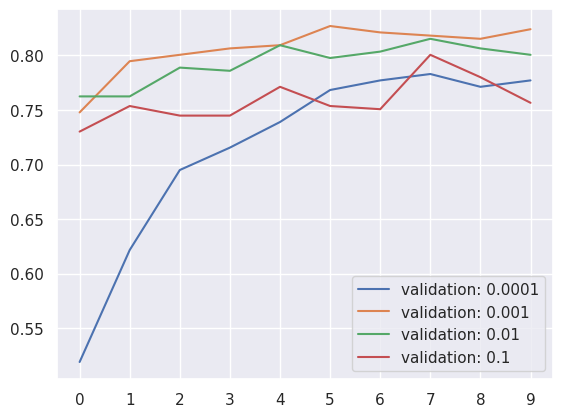

In [ ]:
for learning_rate, history in scores.items():
    # plt.plot(history["accuracy"], label=f"train: {learning_rate}")
    plt.plot(history["val_accuracy"], label=f"validation: {learning_rate}")


plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [ ]:
learning_rate = 0.001

## Checkpointing

Saving the model on a specific iteration when certain conditions are meet


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [ ]:
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[checkpoint],
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.4990 - loss: 1.5025

96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 800ms/step - accuracy: 0.6248 - loss: 1.1180 - val_accuracy: 0.7801 - val_loss: 0.7236
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.7790 - loss: 0.6416

96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 789ms/step - accuracy: 0.7790 - loss: 0.6345 - val_accuracy: 0.8006 - val_loss: 0.6582
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.8368 - loss: 0.4947

96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 789ms/step - accuracy: 0.8305 - loss: 0.5091 - val_accuracy: 0.8123 - val_loss: 0.5879
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 787ms/step - accuracy: 0.8618 - loss: 0.4309 - val_accuracy: 0.8035 - val_loss: 0.6221
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.8907 - loss: 0.3613

96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 790ms/step - accuracy: 0.8830 - loss: 0.3725 - val_accuracy: 0.8211 - val_loss: 0.5622
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 790ms/step - accuracy: 0.9061 - loss: 0.3258 - val_accuracy: 0.8211 - val_loss: 0.5430
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 789ms/step - accuracy: 0.9140 - loss: 0.2925 - val_accuracy: 0.8211 - val_loss: 0.5408
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 790ms/step - accuracy: 0.9276 - loss: 0.2617 - val_accuracy: 0.8006 - val_loss: 0.5494
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9413 - loss: 0.2293

96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 812ms/step - accuracy: 0.9407 - loss: 0.2331 - val_accuracy: 0.8270 - val_loss: 0.5478
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.9587 - loss: 0.2026

96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 820ms/step - accuracy: 0.9514 - loss: 0.2134 - val_accuracy: 0.8299 - val_loss: 0.5640


## Adding more layers


In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

Try different sizes


In [ ]:
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(
        train_dataset, epochs=10, validation_data=validation_dataset
    )
    scores[size] = history.history

    print(20 * "=")

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 811ms/step - accuracy: 0.5098 - loss: 1.4685 - val_accuracy: 0.6188 - val_loss: 1.0868
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 804ms/step - accuracy: 0.7151 - loss: 0.9091 - val_accuracy: 0.7361 - val_loss: 0.8299
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 802ms/step - accuracy: 0.7764 - loss: 0.6887 - val_accuracy: 0.7478 - val_loss: 0.7325
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 801ms/step - accuracy: 0.8214 - loss: 0.5709 - val_accuracy: 0.7859 - val_loss: 0.6571
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 801ms/step - accuracy: 0.8507 - loss: 0.4807 - val_accuracy: 0.7801 - val_loss: 0.6294
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 802ms/step - accuracy: 0.8807 - loss: 0.4144 - val_accuracy: 0.7801 - val_loss: 0.6495
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 800ms/step - accuracy: 0.8882 - loss: 0.3663 - val_accuracy: 0.8065 - val_loss: 0.5826
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 797ms/step - accuracy: 0.9097 - loss: 0.3214 - val_a

Plotting sizes


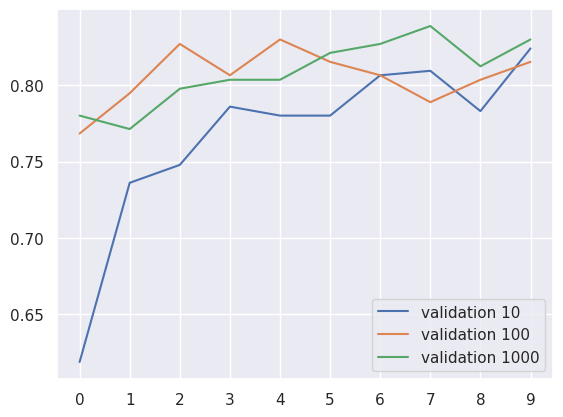

In [ ]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"validation {size}")

plt.xticks(np.arange(10))
plt.legend()
plt.show()

## Regularization and dropout

- Regularization: introduce something that does not allow the neural network overfit to some patterns that does not exist. Ex: when it finds same logo on two different pieces of clothing classify as same like a hat and a t-shirt with same logo classified both as a t-shirt.
- Dropout: randomly hide a part of the input in each iteration. This is done by freezing some part of the neural network so the neuron do not receive the information. Ex: parts of an image


In [ ]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    drop = keras.layers.Dropout(drop_rate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

Define default size


In [ ]:
size = 100

Train model with drop rate hyperparameter


In [ ]:
scores = {}

for drop_rate in [
    0.0,  # 0.0 means no freezing
    0.2,
    0.5,
    0.8,
]:
    print(drop_rate)

    model = make_model(
        learning_rate=learning_rate, size_inner=size, drop_rate=drop_rate
    )
    history = model.fit(
        train_dataset,
        epochs=30,  # While frozen layers, 10 epochs is not enough anymore to learn
        validation_data=validation_dataset,
    )
    scores[drop_rate] = history.history

    print(20 * "=")

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 789ms/step - accuracy: 0.6613 - loss: 0.9749 - val_accuracy: 0.7742 - val_loss: 0.6429
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 807ms/step - accuracy: 0.8259 - loss: 0.5021 - val_accuracy: 0.8123 - val_loss: 0.5964
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 821ms/step - accuracy: 0.8814 - loss: 0.3540 - val_accuracy: 0.8094 - val_loss: 0.5700
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 819ms/step - accuracy: 0.9299 - loss: 0.2462 - val_accuracy: 0.7977 - val_loss: 0.5621
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 819ms/step - accuracy: 0.9436 - loss: 0.1873 - val_accuracy: 0.8094 - val_loss: 0.5793
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 820ms/step - accuracy: 0.9690 - loss: 0.1314 - val_accuracy: 0.8211 - val_loss: 0.5556
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 823ms/step - accuracy: 0.9844 - loss: 0.0913 - val_accuracy: 0.8270 - val_loss: 0.5464
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 826ms/step - accuracy: 0.9899 - loss: 0.0666 - val_

Plot drop rate results


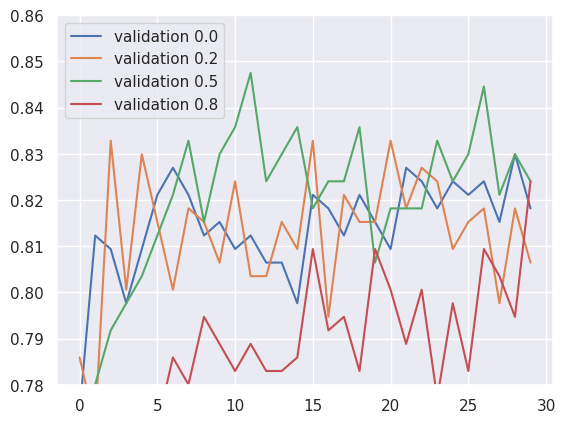

In [ ]:
for drop_rate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"validation {drop_rate}")

plt.ylim(0.78, 0.86)
plt.legend()
plt.show()

## Data Augmentation

Creating more data based on existing data

Possible image transformations:

- Flip
- Rotation
- Height shift
- Shear
- Zoom In/Out X
- Zoom In/Out Y
- Brightness/Contrast
- Combine several transformations


In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10.0,
    height_shift_range=10.0,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=False,
)

train_dataset = train_generator.flow_from_directory(
    DATA_DIR / "train", target_size=(150, 150), batch_size=32
)

# Always keep validation as is, do not add augmented data
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_dataset = train_generator.flow_from_directory(
    DATA_DIR / "validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Training the new model


In [ ]:
learning_rate = 0.001
size = 100
drop_rate = 0.2

model = make_model(
    learning_rate=learning_rate, size_inner=size, drop_rate=drop_rate
)

history = model.fit(
    train_dataset, epochs=50, validation_data=validation_dataset
)

2025-12-30 15:46:14.387886: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 86s 857ms/step - accuracy: 0.5730 - loss: 1.2856 - val_accuracy: 0.6979 - val_loss: 0.9253
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 836ms/step - accuracy: 0.6845 - loss: 0.9130 - val_accuracy: 0.7185 - val_loss: 0.8813
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 836ms/step - accuracy: 0.7285 - loss: 0.7784 - val_accuracy: 0.7214 - val_loss: 0.8249
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 838ms/step - accuracy: 0.7363 - loss: 0.7407 - val_accuracy: 0.7302 - val_loss: 0.8237
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 839ms/step - accuracy: 0.7621 - loss: 0.6814 - val_accuracy: 0.7214 - val_loss: 0.8524
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 837ms/step - accuracy: 0.7790 - loss: 0.6301 - val_accuracy: 0.7595 - val_loss: 0.7277
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 843ms/step - accuracy: 0.7953 - loss: 0.5791 - val_accuracy: 0.7361 - val_loss: 0.7923
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 843ms/step - accuracy: 0.8057 - loss: 0.5662 - val_accu

## Training a larger model

- 299 x 299 model


In [ ]:
def make_model(
    input_size=150, learning_rate=0.01, size_inner=100, drop_rate=0.5
):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(input_size, input_size, 3),
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    drop = keras.layers.Dropout(drop_rate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

Define data


In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rotation_range=30,
    # width_shift_range=10.0,
    # height_shift_range=10.0,
    # shear_range=10,
    # zoom_range=0.1,
    # vertical_flip=False,
)

train_dataset = train_generator.flow_from_directory(
    DATA_DIR / "train", target_size=(299, 299), batch_size=32
)

# Always keep validation as is, do not add augmented data
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_dataset = train_generator.flow_from_directory(
    DATA_DIR / "validation",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Set a checkpoint callback


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

Training a larger model


In [18]:
learning_rate = 0.001
size = 100
drop_rate = 0.2
input_size = 299

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=drop_rate,
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=[checkpoint],
)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6116 - loss: 1.1837

96/96 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.7350 - loss: 0.8060 - val_accuracy: 0.8065 - val_loss: 0.5242
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8416 - loss: 0.4496

96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.8504 - loss: 0.4242 - val_accuracy: 0.8563 - val_loss: 0.4427
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.8791 - loss: 0.3455 - val_accuracy: 0.8475 - val_loss: 0.4293
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9005 - loss: 0.2930

96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9045 - loss: 0.2819 - val_accuracy: 0.8680 - val_loss: 0.3648
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9120 - loss: 0.2548 - val_accuracy: 0.8680 - val_loss: 0.3586
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9305 - loss: 0.2129

96/96 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9254 - loss: 0.2201 - val_accuracy: 0.8768 - val_loss: 0.3667
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9348 - loss: 0.1894 - val_accuracy: 0.8710 - val_loss: 0.3656
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9560 - loss: 0.1506

96/96 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9462 - loss: 0.1675 - val_accuracy: 0.8798 - val_loss: 0.3768
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9508 - loss: 0.1429 - val_accuracy: 0.8798 - val_loss: 0.3668
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9607 - loss: 0.1334

96/96 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9606 - loss: 0.1264 - val_accuracy: 0.8856 - val_loss: 0.3923
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.9638 - loss: 0.1179 - val_accuracy: 0.8827 - val_loss: 0.3898
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9700 - loss: 0.0990 - val_accuracy: 0.8592 - val_loss: 0.4020
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9775 - loss: 0.0885 - val_accuracy: 0.8710 - val_loss: 0.4146
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9804 - loss: 0.0746 - val_accuracy: 0.8710 - val_loss: 0.4258
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9814 - loss: 0.0753 - val_accuracy: 0.8768 - val_loss: 0.4226
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9821 - loss: 0.0655 - val_accuracy: 0.8739 - val_loss: 0.4439
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9879 - loss: 0.0586 - val_accuracy: 0.8680 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9984 - loss: 0.0140 - val_accuracy: 0.8915 - val_loss: 0.5516
Epoch 38/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.9980 - loss: 0.0129 - val_accuracy: 0.8827 - val_loss: 0.5545
Epoch 39/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.9980 - loss: 0.0121 - val_accuracy: 0.8915 - val_loss: 0.5614
Epoch 40/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.8856 - val_loss: 0.5593
Epoch 41/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9987 - loss: 0.0105 - val_accuracy: 0.8856 - val_loss: 0.5368
Epoch 42/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9984 - loss: 0.0128 - val_accuracy: 0.8827 - val_loss: 0.5870
Epoch 43/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - accuracy: 0.9980 - loss: 0.0107 - val_accuracy: 0.8827 - val_loss: 0.5994
Epoch 44/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.9997 - loss: 0.0070 - val_accuracy: 0.8915 - val_l